# CS110 Assignment 3 - Trie trees

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

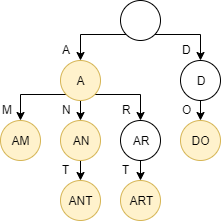

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

For the trie tree, I think separating Trie and Node classes is better than merging them. 
Firstly, if we have only one class, it will be a very specifically applied case. Having Node class separated from a class for building trees allows you to structure different types of trees with the same node without copying the codes of the Node class.
Besides, using only the Node class is more inefficient in performing operations on the trie because ‘self’ in this class would be each node and we have to repeatedly call the method on different nodes to update the trie entirely or partially. As ‘self’ cannot be updated to another node in the class, to reach those near leaf nodes, we have to store a large amount of data about the node at the higher height.

136 words

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [2]:
# VERSION 1 - Node + Trie classes

class Node:
    """
    This class represents one node of a trie tree.
    
    Parameters
    ----------
    children: dict
              it stores a letter as key and self.letter as value
              
    wordend: bol
             True if the Node contains the last letter of word
             
    letter: str
            a letter of node
    """
    def __init__(self, letter):
        """
        Parameters
        ----------
        children: dict
              it stores a letter as key and self.letter as value
              
        wordend: bol
              True if the Node contains the last letter of word

        letter: str
              a letter of node
        """ 
        self.children = {}
        self.wordend = False
        self.letter = letter
        

class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root: class
          Node that defines root node's children, wordend, and letter
          
    word_list : list
            List of strings to be inserted into the trie upon creation.
          
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # initialize the root node as empty node
        self.root = Node('*')
        self.word_list = word_list
        
        # insert all the words in the given list into the trie
        # create the trie
        for word in self.word_list:
            self.insert(word)

    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word : str
            The word to be inserted into the trie.
        """     
        # initialize the current node as the root node
        current_node = self.root
        
        # modify the word to the lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter as a key and value
            if l not in current_node.children:
                current_node.children[l] = Node(l)
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
            
        #after check all the letters, update the current node as the word's end
        current_node.wordend = True
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: class
          Node that defines root node's children, wordend, and letter
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # if the input does not contain any letter 
        # automatically return True 
        # (without these lines, the method will return False although the space does exist)
        if word == '':
            return True
        
        # set the initial current node as root node
        current_node = self.root
        
        # change the word of search into lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter
            if l not in current_node.children:
                return False
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
        
        #after check all the letters, update the current node as the word's end
        return current_node.wordend


# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as to justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve \
lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luinin \
yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí \
Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë \
lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa \
Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai \
hiruvalyë Valimar. Nai elyë hiruva.Namárië!".replace("!", "").replace("?", "").\
replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True

# this is a prefix, but also a word in itself
assert trie.lookup('an') == True

# this is a prefix, but NOT a word

assert trie.lookup('ele') == False

# not in the wordbank
assert trie.lookup('Mithrandir') == False

# Note: There are several ways in which we can condense the text cleaning syntax, 
# without repeating the method replace() multiple times, 
# but we are leaving it this way for clarity.

In [3]:
# YOUR NEW TESTS HERE

#1
assert trie.lookup('lissemiruvóreva') == False

#2
assert trie.lookup('rómeLLo') == True 

#3
assert trie.lookup('síi') == False 

**justification for test cases**

Test case #1 verifies not only the alphabetical letter but also other characters, in this case, “-”, is stored in the trie and is accessible through the lookup method. Since the test case assumes that “-” would not be stored and removed; however, in fact, the trie can create a node with “-” and find ‘lisse-miruvóreva’ from the list.

Test case #2 checks if the code considers the case when both the word we are looking for and the original word in the word bank contains capital letters but for different letters. In this test case, we try to look for the 'rómeLLo', while the original word in the word bank is 'Rómello.' This test case returns true, which is aligned with the instruction that this algorithm is supposed to ignore if the word is capitalized or not -- the word inserted into the trie is 'rómello' due to the insertion operation where all the inputted words are made into the lowercase ones.

Test case #3 is also an edge case where it detects if the word we want to look for consists of the word in the trie and another letter afterwords. Here, ‘sí’ is already in the trie node because the word bank includes ‘Sí’ and ‘sí’; however, the edge case ‘síi’ has an irrelevant letter ‘i.’ Potentially, an algorithm can update the wordend as True when it reaches ‘í’ but fails to mark it back to False when another letter ‘i’ coming after ‘sí.’ Since my implementation accounts for that case, this test case correctly returns False.


## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

Suppose that L represents the number of letters in the word you want to insert or lookup. For the insert(), the time complexity is O(L). In insertion, we first lowercase the input word by using the .lower() method that takes O(L). We then go into the for loop of creating the nodes each of which consists of a letter of the input word. This for loop part takes O(L) because it performs an operation taking O(1) in one loop and runs L times (O(L×1) = O(L)). Therefore, O(L) + O(L) = 2O(L), which is asymptotically O(L).

The lookup() is similarly structured as the insert(), and its time complexity is O(L). After using the .lower() method that takes O(L), the algorithm enters the for loop to search if a letter from the input word exists in the current node of search. This for loop operation takes O(L) because it performs an operation taking O(1) in one loop and runs L times (O(L×1) = O(L)). Therefore, O(L) + O(L) = 2O(L), which is asymptotically O(L). One rare case to be noted is that if the .lookup() method L = 0, it’ll be O(1) because the first two lines of the .lookup() method ask to return True if it received input without any word or letter.
If N represents the number of words inserted into the tree and l represents the average length of those words, the time complexity for the insert() operation for all words in the list would be O(N×l). Similarly, the lookup() operation for all the words in another list would also take O(N×l). 

Both BSTs’ insert and lookup methods have a time complexity, O(h), because, upon insertion or search, we only compare once per depth. If it is balanced, h would be log N. However, since BST restricts each node’s number of children to two, while there are 26 characters for the alphabets and many varieties of combinations of characters upon making words, it is very likely to have an unbalanced BSTs and nearly worst-case time complexity where O(N) for both insert() and lookup(). Furthermore, in BSTs, the larger alphabets are likely to store on a deeper level, which makes it inefficient to find the words starting with the larger alphabets, whereas the trie allows us to almost equally efficiently find the words starting from any alphabets as long as they are in the similar number of letters.  

Yet, runtime for the trie can be higher than that for BSTs if the word list includes a long word. An example can be [‘document’, ‘merchandise’, ‘orchestra’,], whose trie would have height 11 including the root node. On the other hand, the BSTs can have a height of 2, which depends on the type of BST can be reduced to a height of 1. However, the trie can implement many methods other than insertion and lookup methods, such as the autofill dictionary because it stores a single letter per node and can store multiple words with an overlapping prefix into one single path.


## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [4]:
# VERSION 1 - Node + Trie classes

class Node:
    """
    This class represents one node of a trie tree.
    
    Parameters
    ----------
    children: dict
              it stores a letter as key and self.letter as value
              
    wordend: bol
             True if the Node contains the last letter of word
             
    letter: str
            a letter of node
    """
    def __init__(self, letter):
        """
        Parameters
        ----------
        children: dict
              it stores a letter as key and self.letter as value
              
        wordend: bol
              True if the Node contains the last letter of word

        letter: str
              a letter of node
        """ 
        self.children = {}
        self.wordend = False
        self.letter = letter
        

class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root: class
          Node that defines root node's children, wordend, and letter
          
    word_list : list
            List of strings to be inserted into the trie upon creation.
          
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    prepare(self, root, include_count = False):
        A helper method that prepares a alphabetically ordered list 
        and update Node.letter to include its parents's letters.
    alphabetical_list(self):
        Generate a list of words inserted into the trie in alphabetical order.
    
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # initialize the root node as empty node
        self.root = Node('*')
        self.word_list = word_list
        
        # insert all the words in the given list into the trie
        # create the trie
        for word in self.word_list:
            self.insert(word)

    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word : str
            The word to be inserted into the trie.
        """     
        # initialize the current node as the root node
        current_node = self.root
        
        # modify the word to the lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter as a key and value
            if l not in current_node.children:
                current_node.children[l] = Node(l)
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
            
        #after check all the letters, update the current node as the word's end
        current_node.wordend = True
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: class
          Node that defines root node's children, wordend, and letter
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # if the input does not contain any letter 
        # automatically return True 
        # (without these lines, the method will return False although the space does exist)
        if word == '':
            return True
        
        # set the initial current node as root node
        current_node = self.root
        
        # change the word of search into lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter
            if l not in current_node.children:
                return False
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            
            current_node = current_node.children[l]
        
        #after check all the letters, update the current node as the word's end
        return current_node.wordend
    
    
    def prepare(self, root, include_count = False):
        """
        (helper method)
        
        Prepare a alphabetically ordered list 
        and update Node.letter to include its parents's letters
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: Node class
          Node that defines root node's children, wordend, and letter
          It can be the root for the entire Trie tree or can be the root of subtree
        
        include_count: bol
                       If true, include the frequency of the word to alphabetical_lst
        
        Returns
        -------
        list
           list of words (and if include_count = True its frequency) 
           insertion in alphabetical order
        """
        
        # prepare a blank list to store ordered word list
        alphabetical_lst = []
        
        # prepare a queue to append a node from which we check if that consists of word
        queue = []
        
        # add root node to queue
        queue.append(root)
        
        # whie there is any node in queue left to be checked
        while queue:
            
            # choose the last element in the queue to be the current node to be checked
            # so that we can store the word in the alphabetical order
            current_node = queue.pop()
            
            # if the current node includes a word, 
            # append its letter and frequency count to the list
            if current_node.wordend == True:
                # if it does not require to include the frequency count, 
                # just include the letter of current node
                if include_count == False:
                    alphabetical_lst.append(current_node.letter)
                    
                # if it requires to include the frequency count, 
                # just include the letter of current node
                else:
                    alphabetical_lst.append((current_node.letter, current_node.count))

            # create a new dictionary 
            # so that we do not violate the original dictionary of each node's children
            children_list = dict(current_node.children)
            
            # run a while loop when the current node has children
            while children_list:
                
                # choose a child node with the largest alphabet 
                largest = max(children_list)
                
                # except for the case that current node is root node with letter "*"
                # and except for 
                if current_node != root and largest == children_list[largest].letter:
                    # update the letter of largest value of current node's children
                    # as the current node's letter and its child's letter
                    # ,which, as a result, may create a word 
                    children_list[largest].letter =\
                    current_node.letter + children_list[largest].letter

                # append the node with the largest alphabet to the queue
                queue.append(children_list[largest])
                
                # delete the node with the largest alphabet from the list
                del children_list[largest] 

        return alphabetical_lst
    
    
    def alphabetical_list(self):
        """
        Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        return self.prepare(self.root)


I choose the iterative approach for three reasons.

First, the iterative approach is more efficient in terms of time and space. 

Secondly, the recursive approach cannot update each node’s value based on its parental node’s value as it would go to the deepest level of the trie first and go up.

Thirdly, I need to have two types of output list (if the frequency count is included or not) to make this code generalizable to the alphabetical_list() method and the k_most_common() method, but this implementation requires a complicated conditional statement. 

Thus, I choose the iterative method.

96 words

In [5]:
# intiate the test by uncommenting one of the lines below, depending on your approach
wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis \
pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos \
hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur \
ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").\
replace(".", "").split()

trie = Trie(wordbank)
assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [6]:
# YOUR NEW TESTS HERE

# construct a function for creating the alphabetical ordered list

def construct_alpha_order(text):
    """
    input
    --------
    txt: lst
        a list of strings (words) we want to sort
        
    output
    -------
    lst: alphabetically sorted list
    """
    # create a list by lowercasing the letter of all the word in the inputted text
    lst = [word.lower() for word in text]
    
    # sort the list alphabetically
    lst.sort()
    
    # remove the duplicate words in the list
    sorted_lst = list(dict.fromkeys(lst))
    
    return sorted_lst

In [7]:
# three test cases
# 1 
Palindrome = "Are we not pure? “No, sir!” Panama’s moody Noriega brags. \
“It is garbage!” Irony dooms a man—a prisoner up to new era.".replace(",", "").\
replace(".", "").split()

# cited from https://www.grammarly.com/blog/16-surprisingly-funny-palindromes/

trie_palindrome = Trie(Palindrome)
assert trie_palindrome.alphabetical_list() == construct_alpha_order(Palindrome)

construct_alpha_order(Palindrome)
# 2
French_poem = "Demain, dès l’aube, à l’heure où blanchit la campagne, \
Je partirai. Vois-tu, je sais que tu m’attends. \
J’irai par la forêt, j’irai par la montagne. \
Je ne puis demeurer loin de toi plus longtemps. \
Je marcherai les yeux fixés sur mes pensées, \
Sans rien voir au dehors, sans entendre aucun bruit, \
Seul, inconnu, le dos courbé, les mains croisées, \
Triste, et le jour pour moi sera comme la nuit. \
Je ne regarderai ni l’or du soir qui tombe, \
Ni les voiles au loin descendant vers Harfleur, \
Et, quand j’arriverai, je mettrai sur ta tombe \
Un bouquet de houx vert et de bruyère en fleur. \
.".replace(",", "").replace(".", "").split()

# cited from https://thefrenchroomhome.wordpress.com/2020/02/21/famous-french-poems/

trie_French = Trie(French_poem)
assert trie_French.alphabetical_list() == construct_alpha_order(French_poem)


# 3
Korean_song = "Neo ttaeme na ireohke mangajyeo \
Geumanhallae ije neo an gajyeo \
Mothagesseo mwot gataseo \
Jebal pinggye gateun geon samgajwo \
Niga nahante ireom an dwae \
Niga han modeun mareun andae \
Jinsireul garigo nal jjijeo \
Nal jjigeo na michyeo da sirheo \
Jeonbu gajyeoga nan niga geunyang miwo.".replace(",", "").replace(".", "").split()

# cited from https://www.azlyrics.com/lyrics/bangtanboys/ineedu.html

trie_Korean = Trie(Korean_song)
assert trie_Korean.alphabetical_list() == construct_alpha_order(Korean_song)

**justification for test cases**

Test case #1 is a palindrome that allows us to check if the algorithm stores the strings in the correct alphabetical order. Since the first and the last words of the sentence contain the same letters but in different orders, this test case is an efficient way to check if the method correctly collects the words spread in the trie in alphabetical order.

Test case #2 checks if some special alphabetical characters, such as é, ê, and ù, can be alphabetically ordered and outputted in the list. Although those characters generally do not exist in the English sentences, I use French text as a test case to account for that. Since the max() method works for those characters too, this algorithm is proven to be workable for those cases as well.
 
Test case #3 sees if the code accounts for the duplication at the beginning of the words. In my code, I add some conditions for a node’s value to be updated. For instance, if node ‘a’ has a child node ‘m,’ that child node ‘m’ would have ‘am’ as its value. Besides, this test case also verifies the correct alphabetical order for those words with multiple same letters at the word’s start (e.g., the order should be ‘a’, ‘aa’, ‘aaa’). Since the existence of duplicated letters is the edge case for those senses, I add this test case. Though most English words have distinct first and second letters, some Korean letters have aspirated sounds (i.e., strongly pronounced letters), such as ‘ttaeme’ or ‘jjigeo’ which results in the same first and second letters in one word. Thus, I use the romanized Korean letters as an example. 

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [8]:
# VERSION 1 - Node + Trie classes
class Node:
    """
    This class represents one node of a trie tree.
    
    Parameters
    ----------
    children: dict
              it stores a letter as key and self.letter as value
              
    wordend: bol
             True if the Node contains the last letter of word
             
    letter: str
            a letter of node
            
    count: int
             count the frequency of the words inserted into the trie
    """
    def __init__(self, letter):
        """
        Parameters
        ----------
        children: dict
              it stores a letter as key and self.letter as value
              
        wordend: bol
              True if the Node contains the last letter of word

        letter: str
              a letter of node
        
        count: int
             count the frequency of the words inserted into the trie
        """ 
        self.children = {}
        self.wordend = False
        self.letter = letter
        self.count = 0
        

class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root: class
          Node that defines root node's children, wordend, and letter
          
    word_list : list
            List of strings to be inserted into the trie upon creation.
          
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    prepare(self, root, include_count = False):
        A helper method that prepares a alphabetically ordered list 
        and update Node.letter to include its parents's letters.
    alphabetical_list(self):
        Generate a list of words inserted into the trie in alphabetical order.
    sub_k_most_common(self, root, k):
        A helper method that finds k words inserted into the trie most often in the subtree
        under a node.
    k_most_common(self, k):
        Finds k words inserted into the trie most often.
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # initialize the root node as empty node
        self.root = Node('*')
        self.word_list = word_list
        
        # insert all the words in the given list into the trie
        # create the trie
        for word in self.word_list:
            self.insert(word)

    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word : str
            The word to be inserted into the trie.
        """     
        # initialize the current node as the root node
        current_node = self.root
        
        # modify the word to the lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter as a key and value
            if l not in current_node.children:
                current_node.children[l] = Node(l)
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
        
        # if the word is already created in the tree
        # (i.e., the current node is already marked as True)
        # increase the frequency count by 1
        if current_node.wordend == True:
            current_node.count += 1
            
        # if the word has not been included in the tree
        # mark the node as the word's end and change the frequency count as 1
        else:      
            #after check all the letters, update the current node as the word's end
            current_node.wordend = True
            current_node.count = 1
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: class
          Node that defines root node's children, wordend, and letter
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # if the input does not contain any letter 
        # automatically return True 
        # (without these lines, the method will return False although the space does exist)
        if word == '':
            return True
        
        # set the initial current node as root node
        current_node = self.root
        
        # change the word of search into lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter
            if l not in current_node.children:
                return False
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            
            current_node = current_node.children[l]
        
        #after check all the letters, update the current node as the word's end
        return current_node.wordend
    
    
    def prepare(self, root, include_count = False, lst = True):
        """
        (helper method)
        Prepare a alphabetically ordered list 
        and update Node.letter to include its parents's letters
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: Node class
          Node that defines root node's children, wordend, and letter
          It can be the root for the entire Trie tree or can be the root of subtree
        
        include_count: bol
                       If true, include the frequency of the word to alphabetical_lst
        
        lst: bol
           If true, create the alphabetical_lst 
        
        Returns
        -------
        list
           list of words (and if include_count = True its frequency) 
           insertion in alphabetical order
        """
        
        # prepare a blank list to store ordered word list
        alphabetical_lst = []
        
        # prepare a queue to append a node from which we check if that consists of word
        queue = []
        
        # add root node to queue
        queue.append(root)
        
        # whie there is any node in queue left to be checked
        while queue:
            
            # choose the last element in the queue to be the current node to be checked
            # so that we can store the word in the alphabetical order
            current_node = queue.pop()
            
            # if true, create the alphabetical list
            if lst == True:
                # if the current node includes a word, 
                # append its letter and frequency count to the list
                if current_node.wordend == True:
                    # if it does not require to include the frequency count, 
                    # just include the letter of current node
                    if include_count == False:
                        alphabetical_lst.append(current_node.letter)

                    # if it requires to include the frequency count, 
                    # just include the letter of current node
                    else:
                        alphabetical_lst.append((current_node.letter, current_node.count))

            # create a new dictionary 
            # so that we do not violate the original dictionary of each node's children
            children_list = dict(current_node.children)
            
            # run a while loop when the current node has children
            while children_list:
                
                # choose a child node with the largest alphabet 
                largest = max(children_list)
                
                # except for the case that current node is root node with letter "*"
                # and except for 
                if current_node != root and largest == children_list[largest].letter:
                    # update the letter of largest value of current node's children
                    # as the current node's letter and its child's letter
                    # ,which, as a result, may create a word 
                    children_list[largest].letter =\
                    current_node.letter + children_list[largest].letter

                # append the node with the largest alphabet to the queue
                queue.append(children_list[largest])
                
                # delete the node with the largest alphabet from the list
                del children_list[largest] 

        return alphabetical_lst
    
    
    def alphabetical_list(self):
        """
        Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        return self.prepare(self.root)
    
    
    def sub_k_most_common(self, root, k):
        """
        (helper method)
        Finds k words inserted into the trie most often in the subtree under a node.

        Parameters
        ----------
        root: Node class
              Node that defines a node's children, wordend, and letter
              It can be the root for the entire Trie tree or can be the root of subtree
          
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        # prepare the alphabetically ordered word list
        ordered_word_list = self.prepare(root,True)
        
        # if the required number of most common words to be returned is more than
        # the number of words inserted into the trie,
        if k > len(ordered_word_list):
            # update k as the total number of words inserted into the trie
            k = len(ordered_word_list)
          
        # prepare a blank list
        k_most_common_lst = []
        
        for i in range(k):
            # extract the max of the list based on the frequency
            # Note: if multiple words have the same frequency, it sorts in alphabetical order
            max_freq = max(ordered_word_list, key=lambda item:item[1])
            # append it to the list
            k_most_common_lst.append(max_freq)
            # remove it from the ordered word list
            ordered_word_list.remove(max_freq)  
        
        # return the first k elements of the full alphabetically ordered word list
        # note: when k = the total number of words inserted into the trie,
        # it just returned the full alphabetically ordered word list
        return k_most_common_lst
    
    def k_most_common(self, k):
        """
        Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        
        Note
        ------
        When there are multiple most common words with the same frequency,
        the algorithm return the one(s) comes earlier in the letter's alphabetical order.
        
        For instance, when 'a','am' and 'i' has the same frequency 
        (i.e., (‘a’, 122), (‘am’, 122), (‘i’, 122)], and k = 2, 
        the algorithm will return [(‘a’, 122), (‘am’, 122)].
        """
        return self.sub_k_most_common(self.root,k)

In [9]:
# depending on your choice of approach, 
# uncomment one of the lines in the for loop to initiate the test

# you might have to run 'pip install requests' before running this cell 
# since you're downloading data from an online resource 
# please note this might take a while to run

# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: 
# https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg
        
# Note: There are cleaner and more concise ways to write the code above, 
# but this way it should be easily understandable.

In [10]:
# new test cases
# all speeche scripts are by Barack Obama so that we can see what words 
# he include often in his speech
# retrived from http://obamaspeeches.com/

# retrieved from http://obamaspeeches.com/099-Announcement-For-President-Springfield-
# Illinois-Obama-Speech.htm
Presidental_Annoucement = '''
Let me begin by saying thanks to all you who've traveled, from far and wide, to brave
the cold today. We all made this journey for a reason. It's humbling, but in my heart
I know you didn't come here just for me, you came here because you believe in what 
this country can be. In the face of war, you believe there can be peace. In the face 
of despair, you believe there can be hope. In the face of a politics that's shut you 
out, that's told you to settle, that's divided us for too long, you believe we can be
one people, reaching for what's possible, building that more perfect union. That's 
the journey we're on today. But let me tell you how I came to be here. As most of you
know, I am not a native of this great state. I moved to Illinois over two decades 
ago. I was a young man then, just a year out of college; I knew no one in Chicago, 
was without money or family connections. But a group of churches had offered me a job
as a community organizer for $13,000 a year. And I accepted the job, sight unseen, 
motivated then by a single, simple, powerful idea - that I might play a small part in
building a better America. My work took me to some of Chicago's poorest 
neighborhoods. I joined with pastors and lay-people to deal with communities that had
been ravaged by plant closings. I saw that the problems people faced weren't simply 
local in nature - that the decision to close a steel mill was made by distant 
executives; that the lack of textbooks and computers in schools could be traced to 
the skewed priorities of politicians a thousand miles away; and that when a child 
turns to violence, there's a hole in his heart no government could ever fill. It was 
in these neighborhoods that I received the best education I ever had, and where I 
learned the true meaning of my Christian faith. After three years of this work, I 
went to law school, because I wanted to understand how the law should work for those 
in need. I became a civil rights lawyer, and taught constitutional law, and after a 
time, I came to understand that our cherished rights of liberty and equality depend 
on the active participation of an awakened electorate. It was with these ideas in 
mind that I arrived in this capital city as a state Senator. It was here, in 
Springfield, where I saw all that is America converge - farmers and teachers, 
businessmen and laborers, all of them with a story to tell, all of them seeking a 
seat at the table, all of them clamoring to be heard. I made lasting friendships here
- friends that I see in the audience today. It was here we learned to disagree 
without being disagreeable - that it's possible to compromise so long as you know 
those principles that can never be compromised; and that so long as we're willing to 
listen to each other, we can assume the best in people instead of the worst. That's 
why we were able to reform a death penalty system that was broken. That's why we were
able to give health insurance to children in need. That's why we made the tax system 
more fair and just for working families, and that's why we passed ethics reforms that
the cynics said could never, ever be passed. It was here, in Springfield, where 
North, South, East and West come together that I was reminded of the essential 
decency of the American people - where I came to believe that through this decency, 
we can build a more hopeful America. And that is why, in the shadow of the Old State 
Capitol, where Lincoln once called on a divided house to stand together, where common
hopes and common dreams still, I stand before you today to announce my candidacy for 
President of the United States. I recognize there is a certain presumptuousness - a 
certain audacity - to this announcement. I know I haven't spent a lot of time 
learning the ways of Washington. But I've been there long enough to know that the 
ways of Washington must change. The genius of our founders is that they designed a 
system of government that can be changed. And we should take heart, because we've 
changed this country before. In the face of tyranny, a band of patriots brought an 
Empire to its knees. In the face of secession, we unified a nation and set the 
captives free. In the face of Depression, we put people back to work and lifted 
millions out of poverty. We welcomed immigrants to our shores, we opened railroads to
the west, we landed a man on the moon, and we heard a King's call to let justice roll
down like water, and righteousness like a mighty stream. Each and every time, a new 
generation has risen up and done what's needed to be done. Today we are called once 
more - and it is time for our generation to answer that call. For that is our 
unyielding faith - that in the face of impossible odds, people who love their country
can change it. That's what Abraham Lincoln understood. He had his doubts. He had his 
defeats. He had his setbacks. But through his will and his words, he moved a nation 
and helped free a people. It is because of the millions who rallied to his cause that
we are no longer divided, North and South, slave and free. It is because men and 
women of every race, from every walk of life, continued to march for freedom long 
after Lincoln was laid to rest, that today we have the chance to face the challenges 
of this millennium together, as one people - as Americans. All of us know what those 
challenges are today - a war with no end, a dependence on oil that threatens our 
future, schools where too many children aren't learning, and families struggling 
paycheck to paycheck despite working as hard as they can. We know the challenges. 
We've heard them. We've talked about them for years. What's stopped us from meeting 
these challenges is not the absence of sound policies and sensible plans. What's 
stopped us is the failure of leadership, the smallness of our politics - the ease 
with which we're distracted by the petty and trivial, our chronic avoidance of tough 
decisions, our preference for scoring cheap political points instead of rolling up 
our sleeves and building a working consensus to tackle big problems. For the last six
years we've been told that our mounting debts don't matter, we've been told that the 
anxiety Americans feel about rising health care costs and stagnant wages are an 
illusion, we've been told that climate change is a hoax, and that tough talk and an 
ill-conceived war can replace diplomacy, and strategy, and foresight. And when all 
else fails, when Katrina happens, or the death toll in Iraq mounts, we've been told 
that our crises are somebody else's fault. We're distracted from our real failures, 
and told to blame the other party, or gay people, or immigrants. And as people have 
looked away in disillusionment and frustration, we know what's filled the void. The 
cynics, and the lobbyists, and the special interests who've turned our government 
into a game only they can afford to play. They write the checks and you get stuck 
with the bills, they get the access while you get to write a letter, they think they 
own this government, but we're here today to take it back. The time for that politics
is over. It's time to turn the page. We've made some progress already. I was proud to
help lead the fight in Congress that led to the most sweeping ethics reform since 
Watergate. But Washington has a long way to go. And it won't be easy. That's why 
we'll have to set priorities. We'll have to make hard choices. And although 
government will play a crucial role in bringing about the changes we need, more money
and programs alone will not get us where we need to go. Each of us, in our own lives,
will have to accept responsibility - for instilling an ethic of achievement in our 
children, for adapting to a more competitive economy, for strengthening our 
communities, and sharing some measure of sacrifice. So let us begin. Let us begin 
this hard work together. Let us transform this nation. Let us be the generation that 
reshapes our economy to compete in the digital age. Let's set high standards for our 
schools and give them the resources they need to succeed. Let's recruit a new army of
teachers, and give them better pay and more support in exchange for more 
accountability. Let's make college more affordable, and let's invest in scientific 
research, and let's lay down broadband lines through the heart of inner cities and 
rural towns all across America. And as our economy changes, let's be the generation 
that ensures our nation's workers are sharing in our prosperity. Let's protect the 
hard-earned benefits their companies have promised. Let's make it possible for 
hardworking Americans to save for retirement. And let's allow our unions and their 
organizers to lift up this country's middle-class again. Let's be the generation that
ends poverty in America. Every single person willing to work should be able to get 
job training that leads to a job, and earn a living wage that can pay the bills, and 
afford child care so their kids have a safe place to go when they work. Let's do 
this. Let's be the generation that finally tackles our health care crisis. We can 
control costs by focusing on prevention, by providing better treatment to the 
chronically ill, and using technology to cut the bureaucracy. Let's be the generation
that says right here, right now, that we will have universal health care in America 
by the end of the next president's first term. Let's be the generation that finally 
frees America from the tyranny of oil. We can harness homegrown, alternative fuels 
like ethanol and spur the production of more fuel-efficient cars. We can set up a 
system for capping greenhouse gases. We can turn this crisis of global warming into a
moment of opportunity for innovation, and job creation, and an incentive for 
businesses that will serve as a model for the world. Let's be the generation that 
makes future generations proud of what we did here. Most of all, let's be the 
generation that never forgets what happened on that September day and confront the 
terrorists with everything we've got. Politics doesn't have to divide us on this 
anymore - we can work together to keep our country safe. I've worked with Republican 
Senator Dick Lugar to pass a law that will secure and destroy some of the world's 
deadliest, unguarded weapons. We can work together to track terrorists down with a 
stronger military, we can tighten the net around their finances, and we can improve 
our intelligence capabilities. But let us also understand that ultimate victory 
against our enemies will come only by rebuilding our alliances and exporting those 
ideals that bring hope and opportunity to millions around the globe. But all of this 
cannot come to pass until we bring an end to this war in Iraq. Most of you know I 
opposed this war from the start. I thought it was a tragic mistake. Today we grieve 
for the families who have lost loved ones, the hearts that have been broken, and the 
young lives that could have been. America, it's time to start bringing our troops 
home. It's time to admit that no amount of American lives can resolve the political 
disagreement that lies at the heart of someone else's civil war. That's why I have a 
plan that will bring our combat troops home by March of 2008. Letting the Iraqis know
that we will not be there forever is our last, best hope to pressure the Sunni and 
Shia to come to the table and find peace. Finally, there is one other thing that is 
not too late to get right about this war - and that is the homecoming of the men and 
women - our veterans - who have sacrificed the most. Let us honor their valor by 
providing the care they need and rebuilding the military they love. Let us be the 
generation that begins this work. I know there are those who don't believe we can do 
all these things. I understand the skepticism. After all, every four years, 
candidates from both parties make similar promises, and I expect this year will be no
different. All of us running for president will travel around the country offering 
ten-point plans and making grand speeches; all of us will trumpet those qualities we 
believe make us uniquely qualified to lead the country. But too many times, after the
election is over, and the confetti is swept away, all those promises fade from 
memory, and the lobbyists and the special interests move in, and people turn away, 
disappointed as before, left to struggle on their own. That is why this campaign 
can't only be about me. It must be about us - it must be about what we can do 
together. This campaign must be the occasion, the vehicle, of your hopes, and your 
dreams. It will take your time, your energy, and your advice - to push us forward 
when we're doing right, and to let us know when we're not. This campaign has to be 
about reclaiming the meaning of citizenship, restoring our sense of common purpose, 
and realizing that few obstacles can withstand the power of millions of voices 
calling for change. By ourselves, this change will not happen. Divided, we are bound 
to fail. But the life of a tall, gangly, self-made Springfield lawyer tells us that a
different future is possible. He tells us that there is power in words. He tells us 
that there is power in conviction. That beneath all the differences of race and 
region, faith and station, we are one people. He tells us that there is power in 
hope. As Lincoln organized the forces arrayed against slavery, he was heard to say: 
"Of strange, discordant, and even hostile elements, we gathered from the four winds, 
and formed and fought to battle through." That is our purpose here today. That's why 
I'm in this race. Not just to hold an office, but to gather with you to transform a 
nation. I want to win that next battle - for justice and opportunity. I want to win 
that next battle - for better schools, and better jobs, and health care for all. I 
want us to take up the unfinished business of perfecting our union, and building a 
better America. And if you will join me in this improbable quest, if you feel destiny
calling, and see as I see, a future of endless possibility stretching before us; if 
you sense, as I sense, that the time is now to shake off our slumber, and slough off 
our fear, and make good on the debt we owe past and future generations, then I'm 
ready to take up the cause, and march with you, and work with you. Together, starting
today, let us finish the work that needs to be done, and usher in a new birth of 
freedom on this Earth.
'''

# retrived from http://obamaspeeches.com/E11-Barack-Obama-Election-Night-Victory-Speech-
#Grant-Park-Illinois-November-4-2008.htm
Victory_Speech = '''
If there is anyone out there who still doubts that America is a place where all 
things are possible; who still wonders if the dream of our founders is alive in our 
time; who still questions the power of our democracy, tonight is your answer. It’s 
the answer told by lines that stretched around schools and churches in numbers this 
nation has never seen; by people who waited three hours and four hours, many for the 
very first time in their lives, because they believed that this time must be 
different; that their voice could be that difference. It’s the answer spoken by young
and old, rich and poor, Democrat and Republican, black, white, Latino, Asian, Native 
American, gay, straight, disabled and not disabled – Americans who sent a message to 
the world that we have never been a collection of Red States and Blue States: we are,
and always will be, the United States of America. It’s the answer that led those who 
have been told for so long by so many to be cynical, and fearful, and doubtful of 
what we can achieve to put their hands on the arc of history and bend it once more 
toward the hope of a better day. It’s been a long time coming, but tonight, because 
of what we did on this day, in this election, at this defining moment, change has 
come to America. I just received a very gracious call from Senator McCain. He fought 
long and hard in this campaign, and he’s fought even longer and harder for the 
country he loves. He has endured sacrifices for America that most of us cannot begin 
to imagine, and we are better off for the service rendered by this brave and selfless
leader. I congratulate him and Governor Palin for all they have achieved, and I look 
forward to working with them to renew this nation’s promise in the months ahead. I 
want to thank my partner in this journey, a man who campaigned from his heart and 
spoke for the men and women he grew up with on the streets of Scranton and rode with 
on that train home to Delaware, the Vice President-elect of the United States, Joe 
Biden. I would not be standing here tonight without the unyielding support of my best
friend for the last sixteen years, the rock of our family and the love of my life, 
our nation’s next First Lady, Michelle Obama. Sasha and Malia, I love you both so 
much, and you have earned the new puppy that’s coming with us to the White House. And
while she’s no longer with us, I know my grandmother is watching, along with the 
family that made me who I am. I miss them tonight, and know that my debt to them is 
beyond measure. To my campaign manager David Plouffe, my chief strategist David 
Axelrod, and the best campaign team ever assembled in the history of politics – you 
made this happen, and I am forever grateful for what you’ve sacrificed to get it 
done. But above all, I will never forget who this victory truly belongs to – it 
belongs to you. I was never the likeliest candidate for this office. We didn’t start 
with much money or many endorsements. Our campaign was not hatched in the halls of 
Washington – it began in the backyards of Des Moines and the living rooms of Concord 
and the front porches of Charleston. It was built by working men and women who dug 
into what little savings they had to give five dollars and ten dollars and twenty 
dollars to this cause. It grew strength from the young people who rejected the myth 
of their generation’s apathy; who left their homes and their families for jobs that 
offered little pay and less sleep; from the not-so-young people who braved the bitter
cold and scorching heat to knock on the doors of perfect strangers; from the millions
of Americans who volunteered, and organized, and proved that more than two centuries 
later, a government of the people, by the people and for the people has not perished 
from this Earth. This is your victory. I know you didn’t do this just to win an 
election and I know you didn’t do it for me. You did it because you understand the 
enormity of the task that lies ahead. For even as we celebrate tonight, we know the 
challenges that tomorrow will bring are the greatest of our lifetime – two wars, a 
planet in peril, the worst financial crisis in a century. Even as we stand here 
tonight, we know there are brave Americans waking up in the deserts of Iraq and the 
mountains of Afghanistan to risk their lives for us. There are mothers and fathers 
who will lie awake after their children fall asleep and wonder how they’ll make the 
mortgage, or pay their doctor’s bills, or save enough for college. There is new 
energy to harness and new jobs to be created; new schools to build and threats to 
meet and alliances to repair. The road ahead will be long. Our climb will be steep. 
We may not get there in one year or even one term, but America – I have never been 
more hopeful than I am tonight that we will get there. I promise you – we as a people
will get there. There will be setbacks and false starts. There are many who won’t 
agree with every decision or policy I make as President, and we know that government 
can’t solve every problem. But I will always be honest with you about the challenges 
we face. I will listen to you, especially when we disagree. And above all, I will ask
you join in the work of remaking this nation the only way it’s been done in America 
for two-hundred and twenty-one years – block by block, brick by brick, calloused hand
by calloused hand. What began twenty-one months ago in the depths of winter must not 
end on this autumn night. This victory alone is not the change we seek – it is only 
the chance for us to make that change. And that cannot happen if we go back to the 
way things were. It cannot happen without you. So let us summon a new spirit of 
patriotism; of service and responsibility where each of us resolves to pitch in and 
work harder and look after not only ourselves, but each other. Let us remember that 
if this financial crisis taught us anything, it’s that we cannot have a thriving Wall
Street while Main Street suffers – in this country, we rise or fall as one nation; as
one people. Let us resist the temptation to fall back on the same partisanship and 
pettiness and immaturity that has poisoned our politics for so long. Let us remember 
that it was a man from this state who first carried the banner of the Republican 
Party to the White House – a party founded on the values of self-reliance, individual
liberty, and national unity. Those are values we all share, and while the Democratic 
Party has won a great victory tonight, we do so with a measure of humility and 
determination to heal the divides that have held back our progress. As Lincoln said 
to a nation far more divided than ours, “We are not enemies, but friends…though 
passion may have strained it must not break our bonds of affection.” And to those 
Americans whose support I have yet to earn – I may not have won your vote, but I hear
your voices, I need your help, and I will be your President too. And to all those 
watching tonight from beyond our shores, from parliaments and palaces to those who 
are huddled around radios in the forgotten corners of our world – our stories are 
singular, but our destiny is shared, and a new dawn of American leadership is at 
hand. To those who would tear this world down – we will defeat you. To those who seek
peace and security – we support you. And to all those who have wondered if America’s 
beacon still burns as bright – tonight we proved once more that the true strength of 
our nation comes not from our the might of our arms or the scale of our wealth, but 
from the enduring power of our ideals: democracy, liberty, opportunity, and 
unyielding hope. For that is the true genius of America – that America can change. 
Our union can be perfected. And what we have already achieved gives us hope for what 
we can and must achieve tomorrow. This election had many firsts and many stories that
will be told for generations. But one that’s on my mind tonight is about a woman who 
cast her ballot in Atlanta. She’s a lot like the millions of others who stood in line
to make their voice heard in this election except for one thing – Ann Nixon Cooper is
106 years old. She was born just a generation past slavery; a time when there were no
cars on the road or planes in the sky; when someone like her couldn’t vote for two 
reasons – because she was a woman and because of the color of her skin. And tonight, 
I think about all that she’s seen throughout her century in America – the heartache 
and the hope; the struggle and the progress; the times we were told that we can’t, 
and the people who pressed on with that American creed: Yes we can. At a time when 
women’s voices were silenced and their hopes dismissed, she lived to see them stand 
up and speak out and reach for the ballot. Yes we can. When there was despair in the 
dust bowl and depression across the land, she saw a nation conquer fear itself with a
New Deal, new jobs and a new sense of common purpose. Yes we can. When the bombs fell
on our harbor and tyranny threatened the world, she was there to witness a generation
rise to greatness and a democracy was saved. Yes we can. She was there for the buses 
in Montgomery, the hoses in Birmingham, a bridge in Selma, and a preacher from 
Atlanta who told a people that “We Shall Overcome.” Yes we can. A man touched down on
the moon, a wall came down in Berlin, a world was connected by our own science and 
imagination. And this year, in this election, she touched her finger to a screen, and
cast her vote, because after 106 years in America, through the best of times and the 
darkest of hours, she knows how America can change. Yes we can. America, we have come
so far. We have seen so much. But there is so much more to do. So tonight, let us ask
ourselves – if our children should live to see the next century; if my daughters 
should be so lucky to live as long as Ann Nixon Cooper, what change will they see? 
What progress will we have made? This is our chance to answer that call. This is our 
moment. This is our time – to put our people back to work and open doors of 
opportunity for our kids; to restore prosperity and promote the cause of peace; to 
reclaim the American Dream and reaffirm that fundamental truth – that out of many, we
are one; that while we breathe, we hope, and where we are met with cynicism, and 
doubt, and those who tell us that we can’t, we will respond with that timeless creed 
that sums up the spirit of a people: Yes We Can. Thank you, God bless you, and may 
God Bless the United States of America.
'''

# retrived from http://obamaspeeches.com/P-Obama-Inaugural-Speech-Inauguration.htm
Inaugural_Address = ''' 
My fellow citizens: I stand here today humbled by the task 
before us, grateful for the trust you have bestowed, mindful of the sacrifices borne 
by our ancestors. I thank President Bush for his service to our nation, as well as 
the generosity and cooperation he has shown throughout this transition. Forty-four 
Americans have now taken the presidential oath. The words have been spoken during 
rising tides of prosperity and the still waters of peace. Yet, every so often the 
oath is taken amidst gathering clouds and raging storms. At these moments, America 
has carried on not simply because of the skill or vision of those in high office, but
because We the People have remained faithful to the ideals of our forbearers, and 
true to our founding documents. So it has been. So it must be with this generation of
Americans. That we are in the midst of crisis is now well understood. Our nation is 
at war, against a far-reaching network of violence and hatred. Our economy is badly 
weakened, a consequence of greed and irresponsibility on the part of some, but also 
our collective failure to make hard choices and prepare the nation for a new age. 
Homes have been lost; jobs shed; businesses shuttered. Our health care is too costly;
our schools fail too many; and each day brings further evidence that the ways we use 
energy strengthen our adversaries and threaten our planet. These are the indicators 
of crisis, subject to data and statistics. Less measurable but no less profound is a 
sapping of confidence across our land - a nagging fear that America's decline is 
inevitable, and that the next generation must lower its sights. Today I say to you 
that the challenges we face are real. They are serious and they are many. They will 
not be met easily or in a short span of time. But know this, America - they will be 
met. On this day, we gather because we have chosen hope over fear, unity of purpose 
over conflict and discord. On this day, we come to proclaim an end to the petty 
grievances and false promises, the recriminations and worn out dogmas, that for far 
too long have strangled our politics. We remain a young nation, but in the words of 
Scripture, the time has come to set aside childish things. The time has come to 
reaffirm our enduring spirit; to choose our better history; to carry forward that 
precious gift, that noble idea, passed on from generation to generation: the 
God-given promise that all are equal, all are free, and all deserve a chance to 
pursue their full measure of happiness. In reaffirming the greatness of our nation, 
we understand that greatness is never a given. It must be earned. Our journey has 
never been one of short-cuts or settling for less. It has not been the path for the 
faint-hearted - for those who prefer leisure over work, or seek only the pleasures of
riches and fame. Rather, it has been the risk-takers, the doers, the makers of things
- some celebrated but more often men and women obscure in their labor, who have 
carried us up the long, rugged path towards prosperity and freedom. For us, they 
packed up their few worldly possessions and traveled across oceans in search of a new
life. For us, they toiled in sweatshops and settled the West; endured the lash of the
whip and plowed the hard earth. For us, they fought and died, in places like Concord 
and Gettysburg; Normandy and Khe Sahn. Time and again these men and women struggled 
and sacrificed and worked till their hands were raw so that we might live a better 
life. They saw America as bigger than the sum of our individual ambitions; greater 
than all the differences of birth or wealth or faction. This is the journey we 
continue today. We remain the most prosperous, powerful nation on Earth. Our workers 
are no less productive than when this crisis began. Our minds are no less inventive, 
our goods and services no less needed than they were last week or last month or last 
year. Our capacity remains undiminished. But our time of standing pat, of protecting 
narrow interests and putting off unpleasant decisions - that time has surely passed. 
Starting today, we must pick ourselves up, dust ourselves off, and begin again the 
work of remaking America. For everywhere we look, there is work to be done. The state
of the economy calls for action, bold and swift, and we will act - not only to create
new jobs, but to lay a new foundation for growth. We will build the roads and 
bridges, the electric grids and digital lines that feed our commerce and bind us 
together. We will restore science to its rightful place, and wield technology's 
wonders to raise health care's quality and lower its cost. We will harness the sun 
and the winds and the soil to fuel our cars and run our factories. And we will 
transform our schools and colleges and universities to meet the demands of a new age.
All this we can do. And all this we will do. Now, there are some who question the 
scale of our ambitions - who suggest that our system cannot tolerate too many big 
plans. Their memories are short. For they have forgotten what this country has 
already done; what free men and women can achieve when imagination is joined to 
common purpose, and necessity to courage. What the cynics fail to understand is that 
the ground has shifted beneath them - that the stale political arguments that have 
consumed us for so long no longer apply. The question we ask today is not whether our
government is too big or too small, but whether it works - whether it helps families 
find jobs at a decent wage, care they can afford, a retirement that is dignified. 
Where the answer is yes, we intend to move forward. Where the answer is no, programs 
will end. And those of us who manage the public's dollars will be held to account - 
to spend wisely, reform bad habits, and do our business in the light of day - because
only then can we restore the vital trust between a people and their government. Nor 
is the question before us whether the market is a force for good or ill. Its power to
generate wealth and expand freedom is unmatched, but this crisis has reminded us that
without a watchful eye, the market can spin out of control - and that a nation cannot
prosper long when it favors only the prosperous. The success of our economy has 
always depended not just on the size of our Gross Domestic Product, but on the reach 
of our prosperity; on the ability to extend opportunity to every willing heart - not 
out of charity, but because it is the surest route to our common good. As for our 
common defense, we reject as false the choice between our safety and our ideals. Our 
Founding Fathers, faced with perils we can scarcely imagine, drafted a charter to 
assure the rule of law and the rights of man, a charter expanded by the blood of 
generations. Those ideals still light the world, and we will not give them up for 
expedience's sake. And so to all other peoples and governments who are watching 
today, from the grandest capitals to the small village where my father was born: know
that America is a friend of each nation and every man, woman, and child who seeks a 
future of peace and dignity, and we are ready to lead once more. Recall that earlier 
generations faced down fascism and communism not just with missiles and tanks, but 
with the sturdy alliances and enduring convictions. They understood that our power 
alone cannot protect us, nor does it entitle us to do as we please. Instead, they 
knew that our power grows through its prudent use; our security emanates from the 
justness of our cause, the force of our example, the tempering qualities of humility 
and restraint. We are the keepers of this legacy. Guided by these principles once 
more, we can meet those new threats that demand even greater effort - even greater 
cooperation and understanding between nations. We will begin to responsibly leave 
Iraq to its people, and forge a hard-earned peace in Afghanistan. With old friends 
and former foes, we’ll work tirelessly to lessen the nuclear threat, and roll back 
the specter of a warming planet. We will not apologize for our way of life, nor will 
we waver in its defense, and for those who seek to advance their aims by inducing 
terror and slaughtering innocents, we say to you now that our spirit is stronger and 
cannot be broken; you cannot outlast us, and we will defeat you. For we know that our
patchwork heritage is a strength, not a weakness. We are a nation of Christians and 
Muslims, Jews and Hindus - and non-believers. We are shaped by every language and 
culture, drawn from every end of this Earth; and because we have tasted the bitter 
swill of civil war and segregation, and emerged from that dark chapter stronger and 
more united, we cannot help but believe that the old hatreds shall someday pass; that
the lines of tribe shall soon dissolve; that as the world grows smaller, our common 
humanity shall reveal itself; and that America must play its role in ushering in a 
new era of peace. To the Muslim world, we seek a new way forward, based on mutual 
interest and mutual respect. To those leaders around the globe who seek to sow 
conflict, or blame their society's ills on the West - know that your people will 
judge you on what you can build, not what you destroy. To those who cling to power 
through corruption and deceit and the silencing of dissent, know that you are on the 
wrong side of history; but that we will extend a hand if you are willing to unclench 
your fist. To the people of poor nations, we pledge to work alongside you to make 
your farms flourish and let clean waters flow; to nourish starved bodies and feed 
hungry minds. And to those nations like ours that enjoy relative plenty, we say we 
can no longer afford indifference to the suffering outside our borders; nor can we 
consume the world's resources without regard to effect. For the world has changed, 
and we must change with it. As we consider the road that unfolds before us, we 
remember with humble gratitude those brave Americans who, at this very hour, patrol 
far-off deserts and distant mountains. They have something to tell us, just as the 
fallen heroes who lie in Arlington whisper through the ages. We honor them not only 
because they are guardians of our liberty, but because they embody the spirit of 
service; a willingness to find meaning in something greater than themselves. And yet,
at this moment - a moment that will define a generation - it is precisely this spirit
that must inhabit us all. For as much as government can do and must do, it is 
ultimately the faith and determination of the American people upon which this nation 
relies. It is the kindness to take in a stranger when the levees break, the 
selflessness of workers who would rather cut their hours than see a friend lose their
job which sees us through our darkest hours. It is the firefighter's courage to storm
a stairway filled with smoke, but also a parent's willingness to nurture a child, 
that finally decides our fate. Our challenges may be new. The instruments with which 
we meet them may be new. But those values upon which our success depends - honesty 
and hard work, courage and fair play, tolerance and curiosity, loyalty and patriotism
- these things are old. These things are true. They have been the quiet force of 
progress throughout our history. What is demanded then is a return to these truths. 
What is required of us now is a new era of responsibility - a recognition, on the 
part of every American, that we have duties to ourselves, our nation, and the world, 
duties that we do not grudgingly accept but rather seize gladly, firm in the 
knowledge that there is nothing so satisfying to the spirit, so defining of our 
character, than giving our all to a difficult task. This is the price and the promise
of citizenship. This is the source of our confidence - the knowledge that God calls 
on us to shape an uncertain destiny. This is the meaning of our liberty and our creed
- why men and women and children of every race and every faith can join in 
celebration across this magnificent mall, and why a man whose father less than sixty 
years ago might not have been served at a local restaurant can now stand before you 
to take a most sacred oath. So let us mark this day with remembrance, of who we are 
and how far we have traveled. In the year of America's birth, in the coldest of 
months, a small band of patriots huddled by dying campfires on the shores of an icy 
river. The capital was abandoned. The enemy was advancing. The snow was stained with 
blood. At a moment when the outcome of our revolution was most in doubt, the father 
of our nation ordered these words be read to the people: "Let it be told to the 
future world...that in the depth of winter, when nothing but hope and virtue could 
survive...that the city and the country, alarmed at one common danger, came forth to 
meet [it]." America. In the face of our common dangers, in this winter of our 
hardship, let us remember these timeless words. With hope and virtue, let us brave 
once more the icy currents, and endure what storms may come. Let it be said by our 
children's children that when we were tested we refused to let this journey end, that
we did not turn back nor did we falter; and with eyes fixed on the horizon and God's 
grace upon us, we carried forth that great gift of freedom and delivered it safely to
future generations. Thank you. God bless you and God bless the United States of 
America. '''

In [11]:
# YOUR NEW TESTS HERE

# I create a function to construct a trie tree based on the text input
# I use it in Q4 and Q5
def construct_trie(text):
    """
    input
    --------
    text: str
          a text we want to input all the words into Trie class
        
    output
    -------
    trie: trie tree that including all the words in the text created by Trie class
    """
    just_text = ''.join(c for c in text if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " 
                               for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    trie = Trie(just_words)
    return trie
   
    
# Presidental_Annoucement
trie1 = construct_trie(Presidental_Annoucement)
assert trie1.k_most_common(0) == []

# Victory_Speech
trie2 = construct_trie(Victory_Speech)
assert trie2.k_most_common(700) == [('the', 95), ('and', 94), ('of', 54), ('to', 53), 
('we', 47), ('that', 39), ('a', 38), ('in', 32), ('this', 30), ('our', 29), ('for', 27), 
('i', 27), ('who', 26), ('is', 19), ('will', 18), ('you', 17), ('have', 15), ('there', 15), 
('be', 14), ('us', 14), ('with', 14), ('america', 13), ('are', 13), ('on', 13), 
('tonight', 13), ('can', 12), ('from', 12), ('it', 12), ('not', 12), ('people', 12), 
('but', 11), ('by', 11), ('so', 11), ('their', 11), ('was', 11), ('as', 10), ('my', 9), 
('new', 9), ('those', 9), ('what', 9), ('all', 8), ('or', 8), ('she', 8), ('if', 7), 
('know',7), ('many', 7), ('one', 7), ('time', 7), ('yes', 7), ('because', 6), ('change', 6), 
('has', 6), ('her', 6), ('it’s', 6), ('long', 6), ('more', 6), ('nation', 6), 
('when', 6), ('your', 6), ('answer', 5), ('been', 5), ('election', 5), ('hope', 5), 
('let', 5), ('never', 5), ('states', 5), ('told', 5), ('world', 5), ('american', 4), 
('americans', 4), ('back', 4), ('campaign', 4), ('cannot', 4), ('do', 4), ('even', 4),
('get', 4), ('he', 4), ('make', 4), ('may', 4), ('much', 4), ('must', 4), 
('still', 4), ('them', 4), ('they', 4), ('up', 4), ('victory', 4), ('were', 4), 
('while', 4), ('years', 4), ('about', 3), ('after', 3), ('ahead', 3), ('am', 3), 
('at', 3), ('best', 3), ('can’t', 3), ('century', 3), ('democracy', 3), ('didn’t', 3),
('dollars', 3), ('down', 3), ('fall', 3), ('first', 3), ('hand', 3), ('happen', 3),
('hours', 3), ('jobs', 3), ('just', 3), ('made', 3), ('man', 3), ('only', 3), 
('out', 3), ('party', 3), ('progress', 3), ('see', 3), ('seen', 3), ('she’s', 3), 
('support', 3), ('than', 3), ('two', 3), ('united', 3), ('vote', 3), ('where', 3), 
('white', 3), ('work', 3), ('106', 2), ('above', 2), ('achieve', 2), ('achieved', 2),
('always', 2), ('ann', 2), ('around', 2), ('ask', 2), ('atlanta', 2), ('ballot', 2), 
('began', 2), ('belongs', 2), ('better', 2), ('beyond', 2), ('bless', 2), ('block', 2),
('brave', 2), ('brick', 2), ('call', 2), ('calloused', 2), ('cast', 2), ('cause',2),
('challenges', 2), ('chance', 2), ('children', 2), ('come', 2), ('coming', 2), 
('cooper', 2), ('country', 2), ('creed', 2), ('crisis', 2), ('david', 2), ('day', 2),
('did', 2), ('disabled', 2), ('done', 2), ('doors', 2), ('dream', 2), ('each', 2), 
('every', 2), ('family', 2), ('far', 2), ('financial', 2), ('fought', 2), 
('generation', 2), ('god', 2), ('government', 2), ('grew', 2), ('had', 2), ('harder',2),
('here', 2), ('history', 2), ('house', 2), ('how', 2), ('liberty', 2), ('like', 2),
('little', 2), ('live', 2), ('lives', 2), ('longer', 2), ('look', 2), ('love', 2),
('me', 2), ('measure', 2), ('men', 2), ('millions', 2), ('moment', 2), ('months',2),
('nation’s', 2), ('next', 2), ('nixon', 2), ('no', 2), ('old', 2), ('once', 2), 
('opportunity', 2), ('ourselves', 2), ('pay', 2), ('peace', 2), ('politics', 2), 
('power', 2), ('president', 2), ('promise', 2), ('proved', 2), ('put', 2), 
('remember', 2), ('republican', 2), ('rise', 2), ('road', 2), ('schools', 2), 
('seek', 2), ('service', 2), ('should', 2), ('spirit', 2), ('stand', 2), ('stories', 2),
('street', 2), ('strength', 2), ('thank', 2), ('that’s', 2), ('things', 2), 
('times', 2), ('tomorrow', 2), ('touched', 2), ('true', 2), ('twentyone', 2), 
('unyielding', 2), ('values', 2), ('very', 2), ('voice', 2), ('voices', 2), ('wall', 2),
('watching', 2), ('way', 2), ('without', 2), ('woman', 2), ('women', 2), ('won', 2),
('working', 2), ('would', 2), ('year', 2), ('young', 2), ('across', 1), 
('affection', 1), ('afghanistan', 1), ('ago', 1), ('agree', 1), ('alive', 1), 
('alliances', 1), ('alone', 1), ('along', 1), ('already', 1), ('america’s', 1), 
('an', 1), ('anyone', 1), ('anything', 1), ('apathy', 1), ('arc', 1), ('arms', 1), 
('asian', 1), ('asleep', 1), ('assembled', 1), ('autumn', 1), ('awake', 1), 
('axelrod', 1), ('backyards', 1), ('banner', 1), ('beacon', 1), ('begin', 1), 
('believed', 1), ('bend', 1), ('berlin', 1), ('biden', 1), ('bills', 1), 
('birmingham', 1), ('bitter', 1), ('black', 1), ('blue', 1), ('bombs', 1), ('bonds', 1),
('born', 1), ('both', 1), ('bowl', 1), ('braved', 1), ('break', 1), ('breathe', 1),
('bridge', 1), ('bright', 1), ('bring', 1), ('build', 1), ('built', 1), ('burns',1),
('buses', 1), ('came', 1), ('campaigned', 1), ('candidate', 1), ('carried', 1), 
('cars', 1), ('celebrate', 1), ('centuries', 1), ('charleston', 1), ('chief', 1), 
('churches', 1), ('climb', 1), ('cold', 1), ('collection', 1), ('college', 1), 
('color', 1), ('comes', 1), ('common', 1), ('concord', 1), ('congratulate', 1), 
('connected', 1), ('conquer', 1), ('corners', 1), ('could', 1), ('couldn’t', 1), 
('created', 1), ('cynical', 1), ('cynicism', 1), ('darkest', 1), ('daughters', 1), 
('dawn', 1), ('deal', 1), ('debt', 1), ('decision', 1), ('defeat', 1), ('defining', 1),
('delaware', 1), ('democrat', 1), ('democratic', 1), ('depression', 1), 
('depths', 1), ('des', 1), ('deserts', 1), ('despair', 1), ('destiny', 1), 
('determination', 1), ('difference', 1), ('different', 1), ('disagree', 1), 
('dismissed', 1), ('divided', 1), ('divides', 1), ('doctor’s', 1), ('doubt', 1), 
('doubtful', 1), ('doubts', 1), ('dug', 1), ('dust', 1), ('earn', 1), ('earned', 1), 
('earth', 1), ('end', 1), ('endorsements', 1), ('endured', 1), ('enduring', 1), 
('enemies', 1), ('energy', 1), ('enormity', 1), ('enough', 1), ('especially', 1), 
('ever', 1), ('except', 1), ('face', 1), ('false', 1), ('families', 1), ('fathers', 1),
('fear', 1), ('fearful', 1), ('fell', 1), ('finger', 1), ('firsts', 1), ('five', 1),
('forever', 1), ('forget', 1), ('forgotten', 1), ('forward', 1), ('founded', 1), 
('founders', 1), ('four', 1), ('friend', 1), ('friends…though', 1), ('front', 1), 
('fundamental', 1), ('gay', 1), ('generations', 1), ('generation’s', 1), ('genius', 1),
('give', 1), ('gives', 1), ('go', 1), ('governor', 1), ('gracious', 1), 
('grandmother', 1), ('grateful', 1), ('great', 1), ('greatest', 1), ('greatness', 1),
('halls', 1), ('hands', 1), ('harbor', 1), ('hard', 1), ('harness', 1), ('hatched', 1),
('heal', 1), ('hear', 1), ('heard', 1), ('heart', 1), ('heartache', 1), ('heat', 1),
('held', 1), ('help', 1), ('he’s', 1), ('him', 1), ('his', 1), ('home', 1), 
('homes', 1), ('honest', 1), ('hopeful', 1), ('hopes', 1), ('hoses', 1), ('huddled',1), 
('humility', 1), ('ideals', 1), ('imagination', 1), ('imagine', 1), 
('immaturity', 1), ('individual', 1), ('into', 1), ('iraq', 1), ('itself', 1), 
('joe', 1), ('join', 1), ('journey', 1), ('kids', 1), ('knock', 1), ('knows', 1), 
('lady', 1), ('land', 1), ('last', 1), ('later', 1), ('latino', 1), ('leader', 1), 
('leadership', 1), ('led', 1), ('left', 1), ('less', 1), ('lie', 1), ('lies', 1), 
('life', 1), ('lifetime', 1), ('likeliest', 1), ('lincoln', 1), ('line', 1), 
('lines', 1), ('listen', 1), ('lived', 1), ('living', 1), ('lot', 1), ('loves', 1), 
('lucky', 1), ('main', 1), ('malia', 1), ('manager', 1), ('mccain', 1), ('meet', 1), 
('message', 1), ('met', 1), ('michelle', 1), ('might', 1), ('mind', 1), ('miss', 1), 
('moines', 1), ('money', 1), ('montgomery', 1), ('moon', 1), ('mortgage', 1), 
('most', 1), ('mothers', 1), ('mountains', 1), ('myth', 1), ('national', 1), 
('native', 1), ('need', 1), ('night', 1), ('notsoyoung', 1), ('numbers', 1), 
('obama', 1), ('off', 1), ('offered', 1), ('office', 1), ('open', 1), ('organized', 1),
('other', 1), ('others', 1), ('ours', 1), ('overcome', 1), ('own', 1), 
('palaces', 1), ('palin', 1), ('parliaments', 1), ('partisanship', 1), ('partner', 1),
('passion', 1), ('past', 1), ('patriotism', 1), ('perfect', 1), ('perfected', 1),
('peril', 1), ('perished', 1), ('pettiness', 1), ('pitch', 1), ('place', 1), 
('planes', 1), ('planet', 1), ('plouffe', 1), ('poisoned', 1), ('policy', 1), 
('poor', 1), ('porches', 1), ('possible', 1), ('preacher', 1), ('presidentelect', 1),
('pressed', 1), ('problem', 1), ('promote', 1), ('prosperity', 1), ('puppy', 1), 
('purpose', 1), ('questions', 1), ('radios', 1), ('reach', 1), ('reaffirm', 1), 
('reasons', 1), ('received', 1), ('reclaim', 1), ('red', 1), ('rejected', 1), 
('remaking', 1), ('rendered', 1), ('renew', 1), ('repair', 1), ('resist', 1), 
('resolves', 1), ('respond', 1), ('responsibility', 1), ('restore', 1), ('rich', 1), 
('risk', 1), ('rock', 1), ('rode', 1), ('rooms', 1), ('sacrificed', 1), 
('sacrifices', 1), ('said', 1), ('same', 1), ('sasha', 1), ('save', 1), ('saved', 1),
('savings', 1), ('saw', 1), ('scale', 1), ('science', 1), ('scorching', 1), 
('scranton', 1), ('screen', 1), ('security', 1), ('selfless', 1), ('selfreliance', 1),
('selma', 1), ('senator', 1), ('sense', 1), ('sent', 1), ('setbacks', 1), 
('shall', 1), ('share', 1), ('shared', 1), ('shores', 1), ('silenced', 1), 
('singular', 1), ('sixteen', 1), ('skin', 1), ('sky', 1), ('slavery', 1), ('sleep', 1),
('solve', 1), ('someone', 1), ('speak', 1), ('spoke', 1), ('spoken', 1), 
('standing', 1), ('start', 1), ('starts', 1), ('state', 1), ('steep', 1), ('stood', 1),
('straight', 1), ('strained', 1), ('strangers', 1), ('strategist', 1), 
('streets', 1), ('stretched', 1), ('struggle', 1), ('suffers', 1), ('summon', 1), 
('sums', 1), ('task', 1), ('taught', 1), ('team', 1), ('tear', 1), ('tell', 1), 
('temptation', 1), ('ten', 1), ('term', 1), ('they’ll', 1), ('thing', 1), ('think', 1),
('threatened', 1), ('threats', 1), ('three', 1), ('thriving', 1), ('through', 1),
('throughout', 1), ('timeless', 1), ('too', 1), ('toward', 1), ('train', 1), 
('truly', 1), ('truth', 1), ('twenty', 1), ('twohundred', 1), ('tyranny', 1), 
('understand', 1), ('union', 1), ('unity', 1), ('vice', 1), ('volunteered', 1), 
('waited', 1), ('waking', 1), ('want', 1), ('wars', 1), ('washington', 1), ('wealth',1),
('whose', 1), ('win', 1), ('winter', 1), ('witness', 1), ('women’s', 1), 
('wonder', 1), ('wondered', 1), ('wonders', 1), ('won’t', 1), ('worst', 1), ('yet', 1), 
('you’ve', 1)]


# Inaugural_Address
trie3 = construct_trie(Inaugural_Address)
assert trie3.k_most_common(18) == [('the', 133), ('and', 114), ('of', 82), ('to', 70),
                                   ('our', 66), ('we', 61), ('a', 48), ('that', 47),
                                   ('is', 36), ('in', 25), ('this', 24), ('for', 23),
                                   ('us', 23), ('are', 22), ('but', 20), ('it', 19),
                                   ('will', 18), ('on', 17)]

**justification for test cases**

Test case #1 checks if the algorithm works and adequately returns an empty list when k = 0 even if all the words are inserted into the trie and the word list is created. Although the initial input of the text (Obama’s presidential announcement speech) is very lengthy, my k_most_common method does not pick any word and insert it into the list because k = 0 (we are not looking for any most common word of his speech).
 
Test case #2 proves that my algorithm works even when input k is greater than the total number of words in the word list (i.e., the number of most common words we try to find exceeds the total number of words in the given list.) The word list for test case #2 is 660 after the sentence is divided into the list of words ad the words’ duplicates are removed. However, when calling the method k_most_common, we input k = 700. In this case, the code generates a list of most common words for 660 words, the number of words existing in the trie.

Test case #3 verifies if the code is workable when multiple words have an equal frequency but the k_most_common method does not allow to include all those words due to k’s constraint. As shown in the test case, my algorithm can generate the list of 18 most common words by prioritizing ('on', 17) over ('they', 17) based on alphabetical order and inserting the former one to the output. 

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [12]:
# VERSION 1 - Node + Trie classes
class Node:
    """
    This class represents one node of a trie tree.
    
    Parameters
    ----------
    children: dict
              it stores a letter as key and self.letter as value
              
    wordend: bol
             True if the Node contains the last letter of word
             
    letter: str
            a letter of node
            
    count: int
             count the frequency of the words inserted into the trie
    """
    def __init__(self, letter):
        """
        Parameters
        ----------
        children: dict
              it stores a letter as key and self.letter as value
              
        wordend: bol
              True if the Node contains the last letter of word

        letter: str
              a letter of node
        
        count: int
             count the frequency of the words inserted into the trie
        """ 
        self.children = {}
        self.wordend = False
        self.letter = letter
        self.count = 0
        

class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    root: class
          Node that defines root node's children, wordend, and letter
          
    word_list : list
            List of strings to be inserted into the trie upon creation.
          
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    prepare(self, root, include_count = False):
        A helper method that prepares a alphabetically ordered list 
        and update Node.letter to include its parents's letters.
    alphabetical_list(self):
        Generate a list of words inserted into the trie in alphabetical order.
    sub_k_most_common(self, root, k):
        A helper method that finds k words inserted into the trie most often in the subtree
        under a node.
    k_most_common(self, k):
        Finds k words inserted into the trie most often.
    autocomplete(self, prefix):
        Finds the most common word with the given prefix.
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        # initialize the root node as empty node
        self.root = Node('*')
        self.word_list = word_list
        
        # insert all the words in the given list into the trie
        # create the trie
        for word in self.word_list:
            self.insert(word)

    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        root: class
          Node that defines root node's children, wordend, and letter
          
        word : str
            The word to be inserted into the trie.
        """     
        # initialize the current node as the root node
        current_node = self.root
        
        # modify the word to the lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter as a key and value
            if l not in current_node.children:
                current_node.children[l] = Node(l)
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
        
        # if the word is already created in the tree
        # (i.e., the current node is already marked as True)
        # increase the frequency count by 1
        if current_node.wordend == True:
            current_node.count += 1
            
        # if the word has not been included in the tree
        # mark the node as the word's end and change the frequency count as 1
        else:      
            #after check all the letters, update the current node as the word's end
            current_node.wordend = True
            current_node.count = 1
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: class
          Node that defines root node's children, wordend, and letter
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        # if the input does not contain any letter 
        # automatically return True 
        # (without these lines, the method will return False although the space does exist)
        if word == '':
            return True
        
        # set the initial current node as root node
        current_node = self.root
        
        # change the word of search into lower cases
        word = word.lower()
        
        #check all the letters in the inputted word
        for l in word:
            
            # if the letter is not in the current node's children, 
            # create a new node of that letter
            if l not in current_node.children:
                return False
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            
            current_node = current_node.children[l]
        
        #after check all the letters, update the current node as the word's end
        return current_node.wordend
    
    
    def prepare(self, root, include_count = False, lst = True):
        """
        (helper method)
        Prepare a alphabetically ordered list 
        and update Node.letter to include its parents's letters
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        root: Node class
          Node that defines root node's children, wordend, and letter
          It can be the root for the entire Trie tree or can be the root of subtree
        
        include_count: bol
                       If true, include the frequency of the word to alphabetical_lst
        
        lst: bol
           If true, create the alphabetical_lst 
        
        Returns
        -------
        list
           list of words (and if include_count = True its frequency) 
           insertion in alphabetical order
        """
        
        # prepare a blank list to store ordered word list
        alphabetical_lst = []
        
        # prepare a queue to append a node from which we check if that consists of word
        queue = []
        
        # add root node to queue
        queue.append(root)
        
        # whie there is any node in queue left to be checked
        while queue:
            
            # choose the last element in the queue to be the current node to be checked
            # so that we can store the word in the alphabetical order
            current_node = queue.pop()
            
            # if true, create the alphabetical list
            if lst == True:
                # if the current node includes a word, 
                # append its letter and frequency count to the list
                if current_node.wordend == True:
                    # if it does not require to include the frequency count, 
                    # just include the letter of current node
                    if include_count == False:
                        alphabetical_lst.append(current_node.letter)

                    # if it requires to include the frequency count, 
                    # just include the letter of current node
                    else:
                        alphabetical_lst.append((current_node.letter, current_node.count))

            # create a new dictionary 
            # so that we do not violate the original dictionary of each node's children
            children_list = dict(current_node.children)
            
            # run a while loop when the current node has children
            while children_list:
                
                # choose a child node with the largest alphabet 
                largest = max(children_list)
                
                # except for the case that current node is root node with letter "*"
                # and except for 
                if current_node != root and largest == children_list[largest].letter:
                    # update the letter of largest value of current node's children
                    # as the current node's letter and its child's letter
                    # ,which, as a result, may create a word 
                    children_list[largest].letter =\
                    current_node.letter + children_list[largest].letter

                # append the node with the largest alphabet to the queue
                queue.append(children_list[largest])
                
                # delete the node with the largest alphabet from the list
                del children_list[largest] 

        return alphabetical_lst
    
    
    def alphabetical_list(self):
        """
        Delivers the content of the trie in alphabetical order.

        You can create other methods if it helps you,
        but the tests should use this one.
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        return self.prepare(self.root)
    
    
    def sub_k_most_common(self, root, k):
        """
        (helper method)
        Finds k words inserted into the trie most often in the subtree under a node.

        Parameters
        ----------
        root: Node class
              Node that defines a node's children, wordend, and letter
              It can be the root for the entire Trie tree or can be the root of subtree
          
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        # prepare the alphabetically ordered word list
        ordered_word_list = self.prepare(root,True)
        
        # if the required number of most common words to be returned is more than
        # the number of words inserted into the trie,
        if k > len(ordered_word_list):
            # update k as the total number of words inserted into the trie
            k = len(ordered_word_list)
          
        # prepare a blank list
        k_most_common_lst = []
        
        for i in range(k):
            # extract the max of the list based on the frequency
            # Note: if multiple words have the same frequency, it sorts in alphabetical order
            max_freq = max(ordered_word_list, key=lambda item:item[1])
            # append it to the list
            k_most_common_lst.append(max_freq)
            # remove it from the ordered word list
            ordered_word_list.remove(max_freq)  
        
        # return the first k elements of the full alphabetically ordered word list
        # note: when k = the total number of words inserted into the trie,
        # it just returned the full alphabetically ordered word list
        return k_most_common_lst
    
    def k_most_common(self, k):
        """
        Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        I.e. the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        
        Note
        ------
        When there are multiple most common words with the same frequency,
        the algorithm return the one(s) comes earlier in the letter's alphabetical order.
        
        For instance, when 'a','am' and 'i' has the same frequency 
        (i.e., (‘a’, 122), (‘am’, 122), (‘i’, 122)], and k = 2, 
        the algorithm will return [(‘a’, 122), (‘am’, 122)].
        """
        return self.sub_k_most_common(self.root,k)

    def autocomplete(self, prefix):
        """
        Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
        #use prefix as value to extract key
        current_node = self.root

        #check all the letters in the inputted word
        for l in prefix:
            
            # if prefix doesn't exist in the trie tree at all
            # return the prefix
            if l not in current_node.children:
                return prefix
                
            # if there is already a letter in the current node's children
            # update the current node as its children node to look
            current_node = current_node.children[l]
                
        # if the current node is the end of a word
        # and if there is no more children to this node
            # (in which case we don't have to check potential most common word)
        # return the prefix
        if current_node.wordend == True and current_node.children == {}:
            return prefix
        
        # update all the nodes' letters by calling prepare method
        # e.g., for node 'm', its letter will be 'am' if it has a direct parent node 'm'.
        self.prepare(self.root, lst = False)
        
        # find the most common word found under the current node
        potential = self.sub_k_most_common(current_node, 1)
        
        # since the current_node.letter is included in the potential[0][0] 
        # after updating all nodes' letters using 'prepare' method
        # we remove those letters from prefix
        
        # make it string to prevent error message Nonetype
        return str(prefix[:-len(current_node.letter)] + potential[0][0])

In [13]:
# depending on your choice of approach, uncomment one of the lines below
# The Complete Works of William Shakespeare is a LARGE book, 
# so the code might take a while to run

from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for 
                              c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [14]:
# NEW TEST CASES
# Import victory speech from Q4
trie2 = construct_trie(Victory_Speech)
assert trie2.autocomplete('a') == 'and'

assert trie2.autocomplete('ame') == 'america'

assert trie2.autocomplete('bricks') == 'bricks'

My autocomplete engine is the combination of lookup() and k_most_common() method. 
First, I check if any word in the tree includes the prefix. As soon as the code detects the mismatch between the prefix and available word (letters), it returns the prefix. If the prefix itself is a word in the trie and there is no other word that includes the prefix, we don’t call k_most_common() and just return the prefix. Otherwise, we call prepare() method to update the letter (each node’s value) and find the most common phrase that comes after the last letter of prefix by calling sub_k_most_common() method. Lastly, we combine part of the prefix and the most common phrase and output this as a string.


The time complexity of this operation is asimptotically O(N×l). If the prefix’s length is P, the number of words inserted into the trie is N, and the average length of those words is l, the time complexity will be O(P) <for loop of checking all prefix>+ O(1) <if condition for returning prefix> + O(N×l) <calling prepare() method> + O(N×(l-p)) <calling sub_k_most_common() method> + O(l^2) <string concatenation>, which is asimptotically O(N×l).


Since there is some duplicate operation of prepare() method, we may do better by removing the overlapping part. For instance, after calling prepare() method for all the nodes in the trie, we call prepare() partially for the sub_k_most_common(), which means there is an unnecessary overlapping. I might able to avoid this problem by having separate methods. First method updates all the nodes’ values (i.e., self.letter) without creating an alphabetically ordered list. Second method specifically focuses on finding the most common phrase that comes after the last letter of prefix but does not have to check the if statement that checks if the nodes’ values are updated or not. The runtime can be shorter by little, but asimptotically there is no difference between the current and improved version because calling prepare() method is still remaining.

331 words

**justification for test cases**

Test case #1 checks the case when the inputted string itself is a word, but it is not the most frequent word for all the words containing the string as a prefix. As shown in the k_most_common() from Q4, ('and', 94) has the highest frequency among words starting with ‘a’ -- even more frequent than the prefix itself, ('a', 38).

Test case #2 considers the case where the input word is a prefix of many different words. In fact, ‘ame’ is a prefix for 'america', 'american', 'americans', 'america’s,' but the code chooses 'america' as auto-filled word because it has highest frequency -- ('america', 13) ('american', 4) ('americans', 4).

Test case #3 is when the input strings include the word existing in the trie but is not the word existing in the trie. Since this case is equivalent to the case when there is no valid word in trie, the code is supposed to return the input strings. ‘bricks’ is the edge case because in the if statement ‘if l not in current_node.children: return prefix’, where l == ‘s’ and the current node is a node with ‘k’ as its key, current_node.children is blank dictionary and the current node is the word:s end too. Depending on the implementation of the conditional statement here, the code may return ‘brick’ instead of ‘bricks.’ 